<a href="https://colab.research.google.com/github/waelrash1/time_series_forecasting_dt302-2/blob/main/Arima%20Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load necessary library
library(tidyverse) #for data manipulation and visualization
library(lubridate) #for datetime data
library(stringr) #for string data
library(forecast) #for time series prediction
#Install packages 
# install.packages("forecast")

Set the plot options

##  Load libraries and set global parameters

In [1]:
packages =  c("ggplot2", "dplyr", "tidyr", "data.table", 'corrplot', 'gridExtra', 'forecast', 'tseries', 'TSA', 'tibble', 'TTR', 'xts', 'dygraphs', 'assertthat')

my.install <- function(pkg, ...){
  if (!(pkg %in% installed.packages()[,1])) {
    install.packages(pkg)
  }
  return (library(pkg, ...))
}

purrr::walk(packages, my.install, character.only = TRUE, warn.conflicts = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Read Data


In [2]:
s_data <- read.csv(file ="https://raw.githubusercontent.com/waelrash1/time_series_forecasting_dt302-2/main/all_stocks_2006-01-01_to_2018-01-01.csv")

## Data overview

In [3]:
summary(s_data)


     Date                Open              High              Low         
 Length:93612       Min.   :   6.75   Min.   :   7.17   Min.   :   0.00  
 Class :character   1st Qu.:  33.95   1st Qu.:  34.29   1st Qu.:  33.60  
 Mode  :character   Median :  60.04   Median :  60.63   Median :  59.49  
                    Mean   :  85.62   Mean   :  86.39   Mean   :  84.84  
                    3rd Qu.:  94.00   3rd Qu.:  94.74   3rd Qu.:  93.25  
                    Max.   :1204.88   Max.   :1213.41   Max.   :1191.15  
                    NA's   :25        NA's   :10        NA's   :20       
     Close             Volume              Name          
 Min.   :   6.66   Min.   :        0   Length:93612      
 1st Qu.:  33.96   1st Qu.:  5040180   Class :character  
 Median :  60.05   Median :  9701142   Mode  :character  
 Mean   :  85.64   Mean   : 20156670                     
 3rd Qu.:  94.01   3rd Qu.: 20752222                     
 Max.   :1195.83   Max.   :843264044                     
  

In [4]:
str(s_data)

'data.frame':	93612 obs. of  7 variables:
 $ Date  : chr  "2006-01-03" "2006-01-04" "2006-01-05" "2006-01-06" ...
 $ Open  : num  77.8 79.5 78.4 78.6 78.5 ...
 $ High  : num  79.3 79.5 78.7 78.9 79.8 ...
 $ Low   : num  77.2 78.2 77.6 77.6 78.5 ...
 $ Close : num  79.1 78.7 78 78.6 79 ...
 $ Volume: int  3117200 2558000 2529500 2479500 1845600 1919900 1911900 2121100 1925300 2073400 ...
 $ Name  : chr  "MMM" "MMM" "MMM" "MMM" ...


## Data cleaning

In [8]:
#check for any missing values
sapply(s_data, function(x) sum(is.na(x)))

Date   Open   High    Low  Close Volume   Name 
     0      0      0      0      0      0      0

In [9]:
s_data[is.na(s_data)] <- 0
s_data$Date <- as.Date(s_data$Date, format = "%Y-%m-%d")
summary(s_data)



      Date                 Open              High              Low         
 Min.   :2006-01-03   Min.   :   0.00   Min.   :   0.00   Min.   :   0.00  
 1st Qu.:2008-12-31   1st Qu.:  33.93   1st Qu.:  34.28   1st Qu.:  33.59  
 Median :2011-12-30   Median :  60.01   Median :  60.62   Median :  59.47  
 Mean   :2012-01-01   Mean   :  85.60   Mean   :  86.38   Mean   :  84.82  
 3rd Qu.:2015-01-02   3rd Qu.:  93.99   3rd Qu.:  94.74   3rd Qu.:  93.24  
 Max.   :2017-12-29   Max.   :1204.88   Max.   :1213.41   Max.   :1191.15  
     Close             Volume              Name          
 Min.   :   6.66   Min.   :        0   Length:93612      
 1st Qu.:  33.96   1st Qu.:  5040180   Class :character  
 Median :  60.05   Median :  9701142   Mode  :character  
 Mean   :  85.64   Mean   : 20156670                     
 3rd Qu.:  94.01   3rd Qu.: 20752222                     
 Max.   :1195.83   Max.   :843264044                     

'data.frame':	93612 obs. of  7 variables:
 $ Date  : Date, format: "2006-01-03" "2006-01-04" ...
 $ Open  : num  77.8 79.5 78.4 78.6 78.5 ...
 $ High  : num  79.3 79.5 78.7 78.9 79.8 ...
 $ Low   : num  77.2 78.2 77.6 77.6 78.5 ...
 $ Close : num  79.1 78.7 78 78.6 79 ...
 $ Volume: int  3117200 2558000 2529500 2479500 1845600 1919900 1911900 2121100 1925300 2073400 ...
 $ Name  : chr  "MMM" "MMM" "MMM" "MMM" ...


In [10]:
str(s_data)

'data.frame':	93612 obs. of  7 variables:
 $ Date  : Date, format: "2006-01-03" "2006-01-04" ...
 $ Open  : num  77.8 79.5 78.4 78.6 78.5 ...
 $ High  : num  79.3 79.5 78.7 78.9 79.8 ...
 $ Low   : num  77.2 78.2 77.6 77.6 78.5 ...
 $ Close : num  79.1 78.7 78 78.6 79 ...
 $ Volume: int  3117200 2558000 2529500 2479500 1845600 1919900 1911900 2121100 1925300 2073400 ...
 $ Name  : chr  "MMM" "MMM" "MMM" "MMM" ...


## Time Series Analysis
Now lets look at some individual stocks and individual time series (Open, Close, High, Low, Volume)

In [11]:
tmp <- filter(s_data, High > 100)
length(unique(tmp$Name))

[1] 20

In [16]:
unique(tmp$Name)

[1] "MMM"   "AXP"   "AAPL"  "BA"    "CAT"   "CVX"   "DIS"   "XOM"   "GS"   
[10] "HD"    "IBM"   "JNJ"   "JPM"   "MCD"   "TRV"   "UTX"   "UNH"   "WMT"  
[19] "GOOGL" "AMZN"

In [24]:
sample_num=5
sample_ticker <- as.character(sample(tmp$Name, sample_num))


In [26]:
candidate_ticker <- c("IBM", "BA", "AAPL", "GS", "GOOGL")
candidate_num <- length(candidate_ticker)

In [55]:
candidate_ticker <- c("IBM", "BA", "AAPL", "GS", "GOOGL")
candidate_num <- length(candidate_ticker)
stock_list <- vector(mode="list", length=candidate_num)
names(stock_list) <- candidate_ticker
i = 1
for (ticker in candidate_ticker){
  stock_list[[i]] <- filter(s_data, Name == ticker)
  # print(stock_list[[i]])
  i <- i+1
  # print(ticker)
}
str(stock_list)

List of 5
 $ IBM  :'data.frame':	3020 obs. of  7 variables:
  ..$ Date  : Date[1:3020], format: "2006-01-03" "2006-01-04" ...
  ..$ Open  : num [1:3020] 82.5 82.2 81.4 84 84.1 ...
  ..$ High  : num [1:3020] 82.5 82.5 82.9 85 84.2 ...
  ..$ Low   : num [1:3020] 80.8 81.3 81 83.4 83.4 ...
  ..$ Close : num [1:3020] 82.1 82 82.5 85 83.7 ...
  ..$ Volume: int [1:3020] 11715200 9840600 7213500 8197400 6858200 5701000 5776500 4926500 6921700 8761700 ...
  ..$ Name  : chr [1:3020] "IBM" "IBM" "IBM" "IBM" ...
 $ BA   :'data.frame':	3020 obs. of  7 variables:
  ..$ Date  : Date[1:3020], format: "2006-01-03" "2006-01-04" ...
  ..$ Open  : num [1:3020] 70.4 70.1 70.5 70.3 69.3 ...
  ..$ High  : num [1:3020] 70.6 71.3 70.5 70.5 69.4 ...
  ..$ Low   : num [1:3020] 69.3 69.9 69.6 69 68.7 ...
  ..$ Close : num [1:3020] 70.4 71.2 70.3 69.3 68.8 ...
  ..$ Volume: int [1:3020] 4943100 3165000 4598300 4820200 4567700 3869000 5011900 2347000 2963700 2712900 ...
  ..$ Name  : chr [1:3020] "BA" "BA" "BA" "B

## Google High price

In [56]:
 stock_google = stock_list[['GOOGL']]
 summary(stock_google)
 

      Date                 Open             High             Low        
 Min.   :2006-01-03   Min.   : 131.4   Min.   : 134.8   Min.   : 123.8  
 1st Qu.:2009-01-01   1st Qu.: 247.8   1st Qu.: 250.2   1st Qu.: 244.0  
 Median :2011-12-30   Median : 310.5   Median : 312.8   Median : 307.8  
 Mean   :2012-01-01   Mean   : 428.2   Mean   : 431.8   Mean   : 424.1  
 3rd Qu.:2015-01-01   3rd Qu.: 572.1   3rd Qu.: 576.0   3rd Qu.: 565.9  
 Max.   :2017-12-29   Max.   :1083.0   Max.   :1086.5   Max.   :1072.3  
     Close            Volume             Name          
 Min.   : 128.8   Min.   :  521141   Length:3019       
 1st Qu.: 247.6   1st Qu.: 1760854   Class :character  
 Median : 310.1   Median : 2517630   Mode  :character  
 Mean   : 428.0   Mean   : 3551504                     
 3rd Qu.: 570.8   3rd Qu.: 4242182                     
 Max.   :1085.1   Max.   :41182889                     

## Plot Time Series for Google High price

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  134.8   250.2   312.8   431.8   576.0  1086.5 

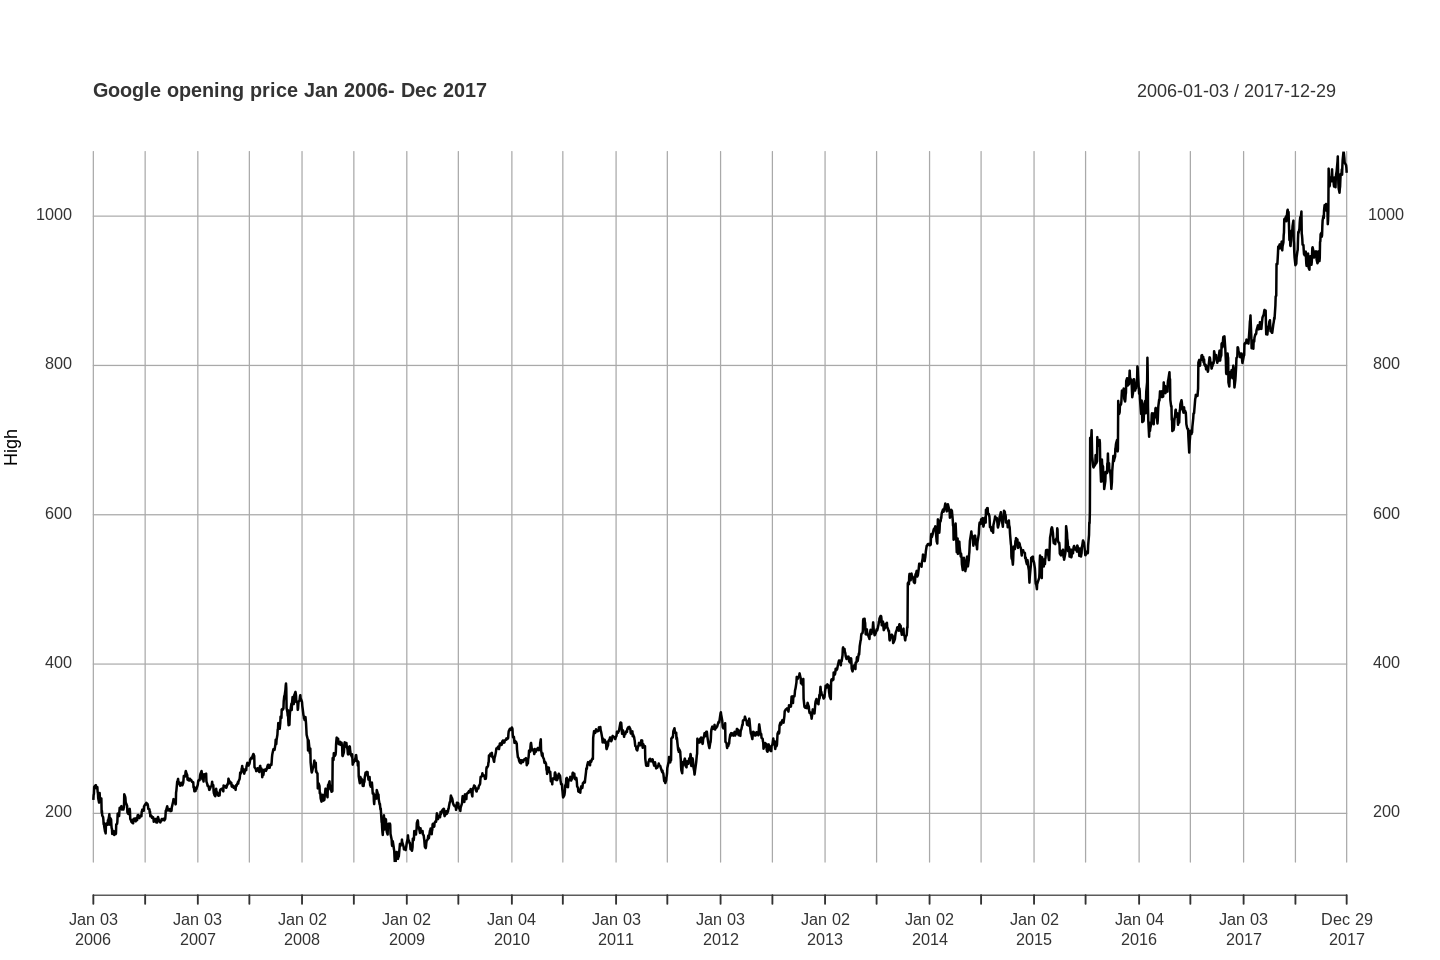

In [84]:

xts =xts(stock_google$High,order.by=stock_google$Date )

  attr(xts, 'frequency') <- length(xts)/12 # 12 years data set, daily stock
   ts = as.ts(xts, start = c(2006))
 summary(ts)

 options(repr.plot.width=12, repr.plot.height=8)

 plot(xts,xlab="Time", ylab="High", main="Google opening price Jan 2006- Dec 2017")
 #summary(stock_google_high)


## Stationarity
The above time series does not look stationary.

To confirm that we will use “Dickey-Fuller test” to determine stationarity.

Dickey-Fuller test for variable

In [85]:
adf.test( xts, alternative = "stationary", k = 0)




	Augmented Dickey-Fuller Test

data:  xts
Dickey-Fuller = -1.1237, Lag order = 0, p-value = 0.9188
alternative hypothesis: stationary


## Decomposing Time Series

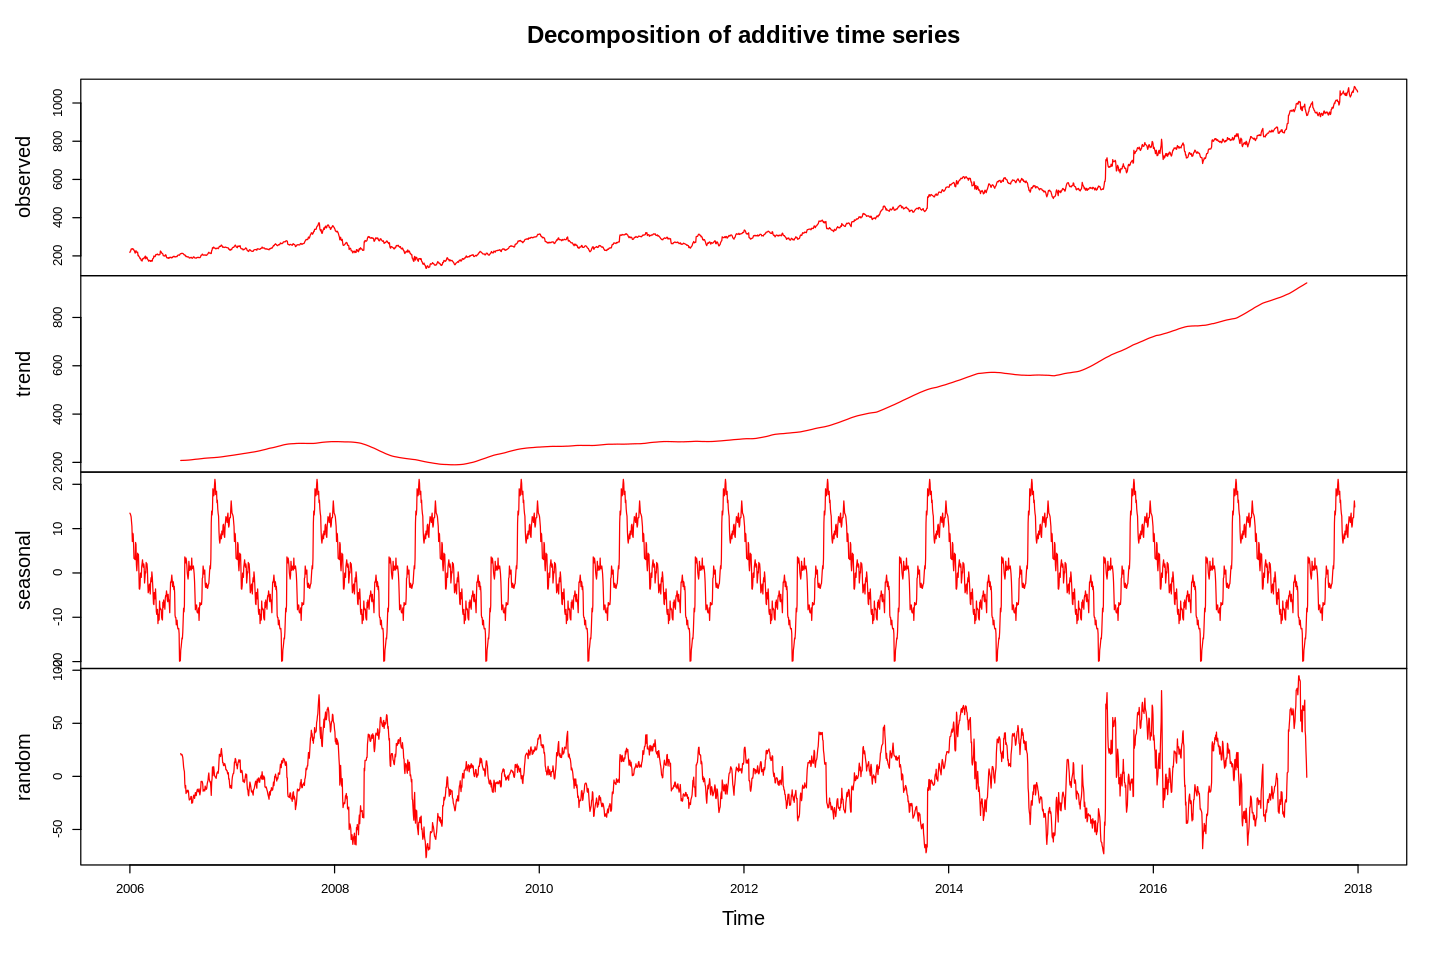

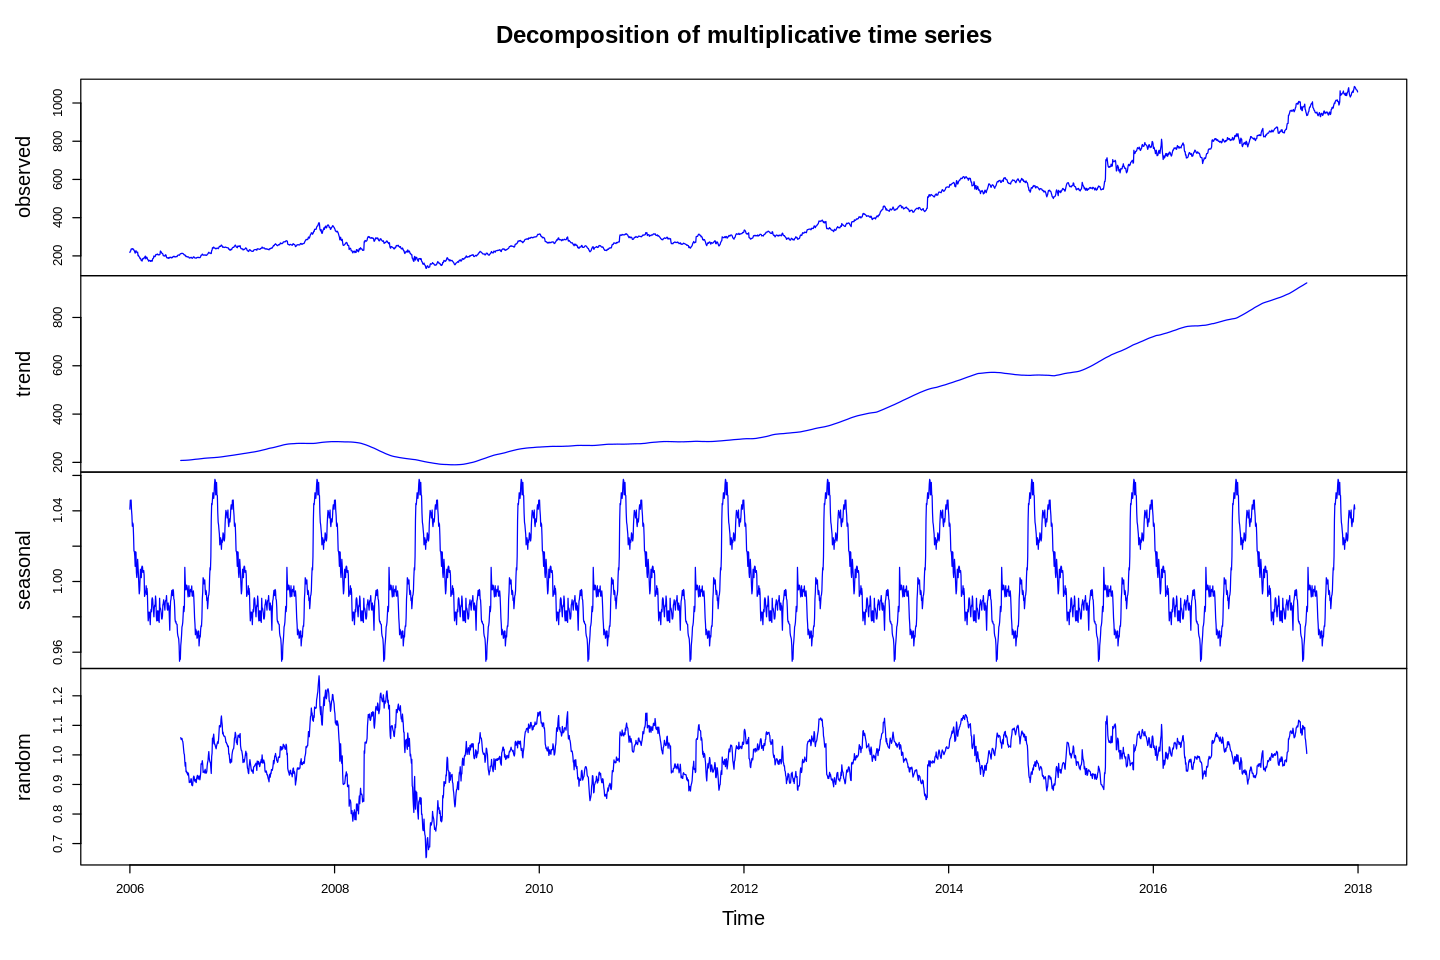

In [86]:
tscomponents_add <- decompose(ts, type = "additive")
tscomponents_mul <- decompose(ts, type = "multiplicative")
plot(tscomponents_add, col = "red"  )
plot(tscomponents_mul, col = "blue")

## Differencing a Time Series
Differencing is a common solution used to stationarize the variable. We will perform differencing using R function diff.

Consider fractional ?

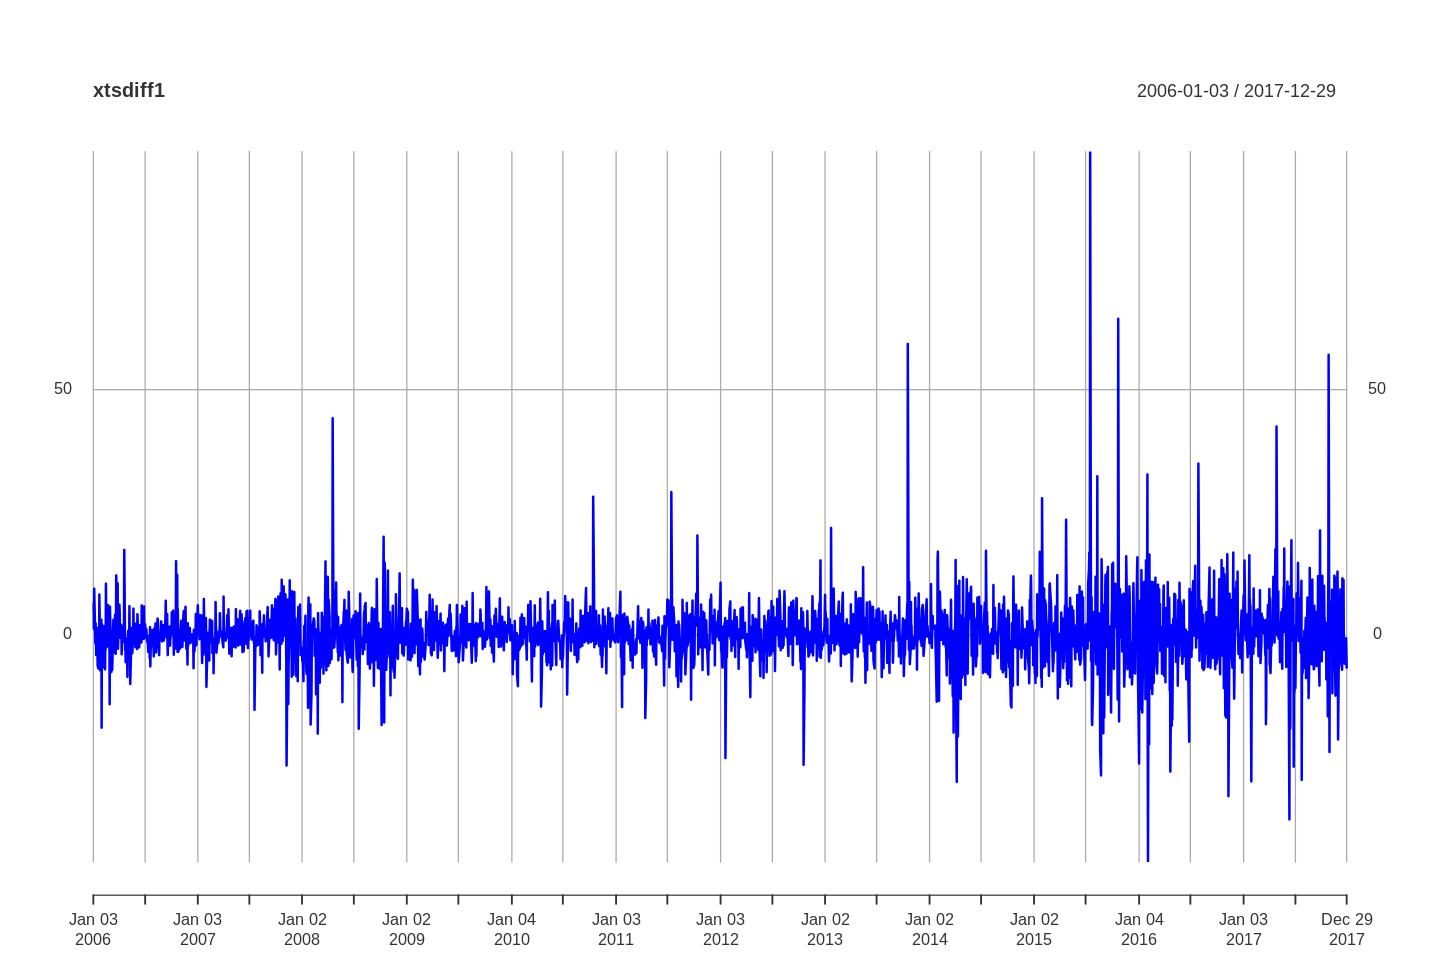

In [93]:
#xtsdiff1 <- diff(xts, differences=1)
xtsdiff1 <- diff(xts, differences=1)
tsdiff1 <- diff(ts, differences=1)

plot.xts(xtsdiff1, col = "blue")


In [94]:
adf.test(tsdiff1, alternative = "stationary", k = 0)


Warning message in adf.test(tsdiff1, alternative = "stationary", k = 0):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  tsdiff1
Dickey-Fuller = -49.185, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [73]:
?adf.test

## Selecting a Candidate ARIMA Model

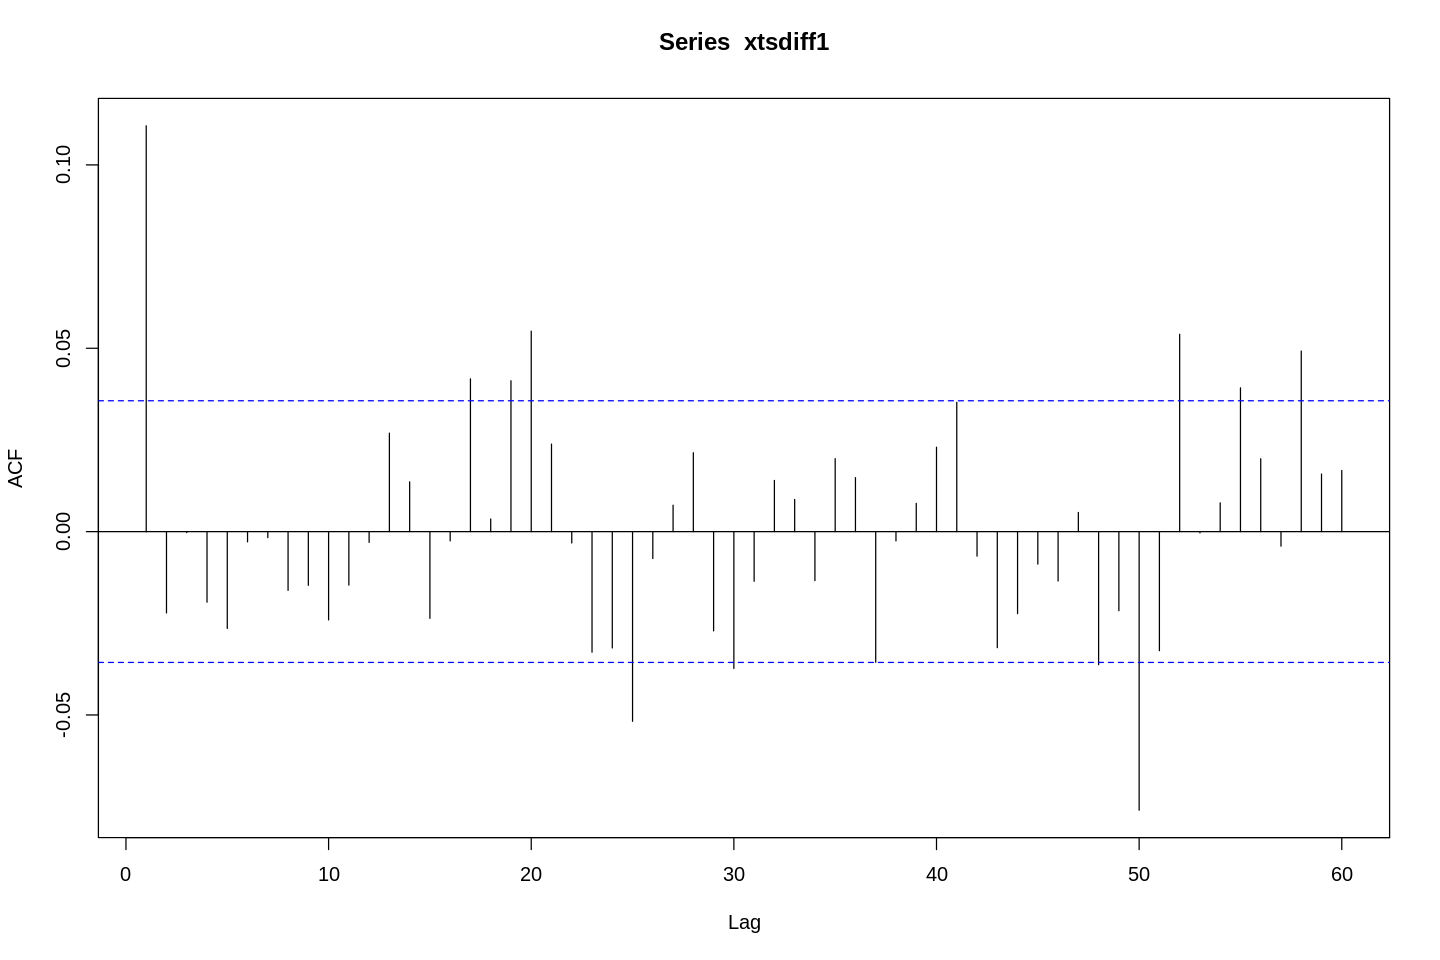

In [95]:
Acf(xtsdiff1, lag.max=60)

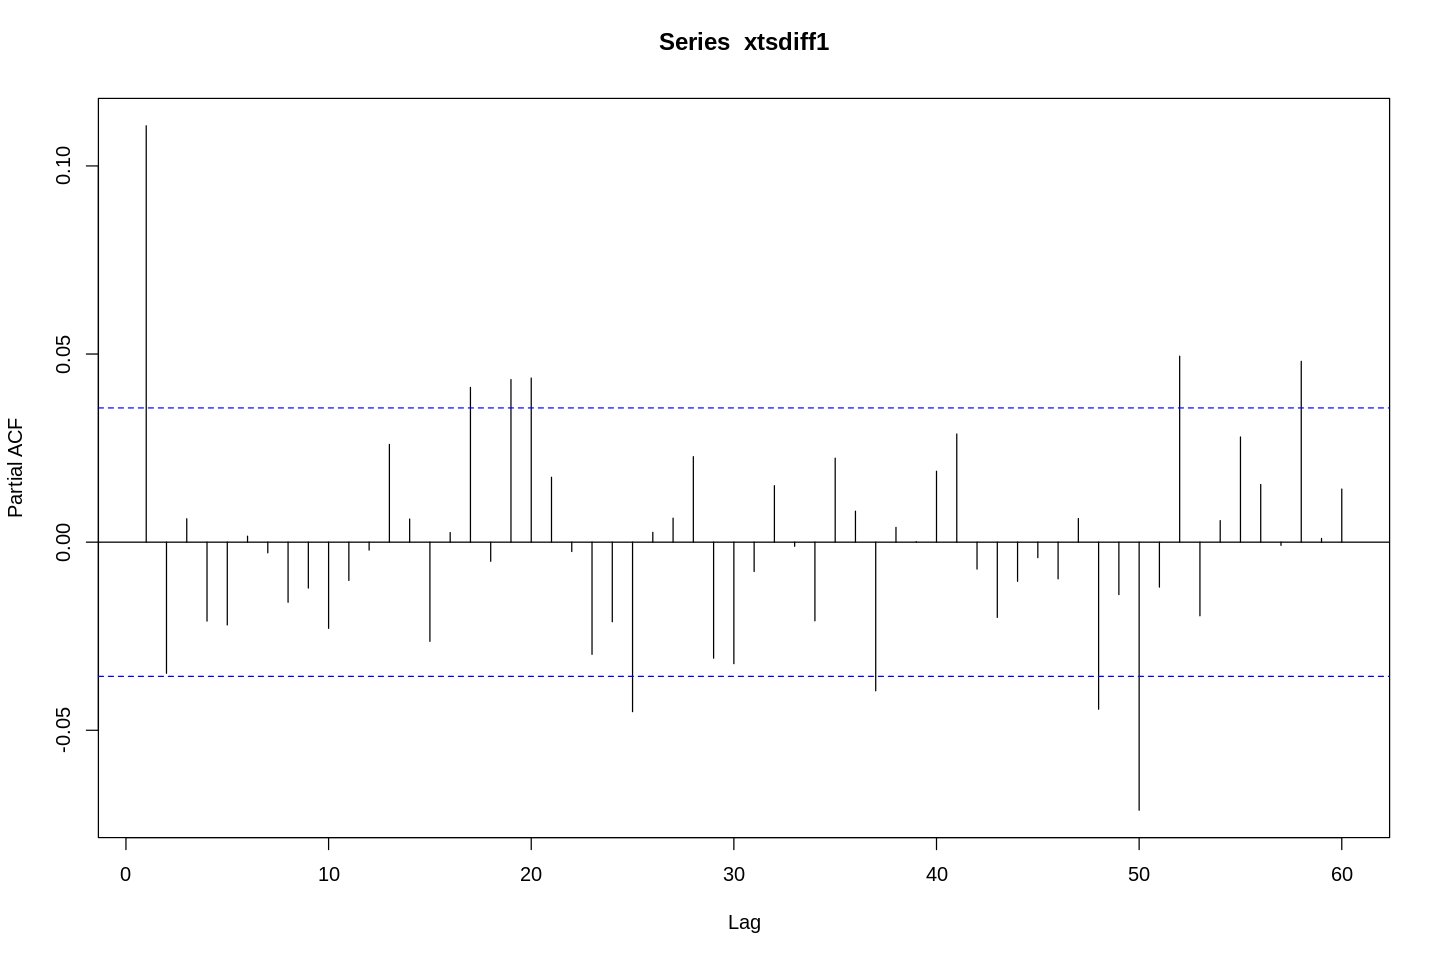

In [96]:
Pacf(xtsdiff1, lag.max=60)  

## Fitting Arima Model
Now, we could compare the sample ACF and PACF to those of various theoretical ARMA models. Use properties of ACF & PACF as a guide to estimate plausible models and select appropriate p, q and d. Alternative to this is discussed next

In [99]:
tsarima240 <- auto.arima(head(xts, -240), max.p = 3, 
                                          max.q = 3, max.d = 3,
                                          trace = T) 
                                          # excluding last 240 time series as test data


ERROR: ignored

In [100]:
print(tsarima240)

Series: head(xts, -240) 
ARIMA(0,1,1) with drift 

Coefficients:
         ma1   drift
      0.1303  0.2203
s.e.  0.0192  0.1289

sigma^2 = 36.15:  log likelihood = -8924.23
AIC=17854.45   AICc=17854.46   BIC=17872.24


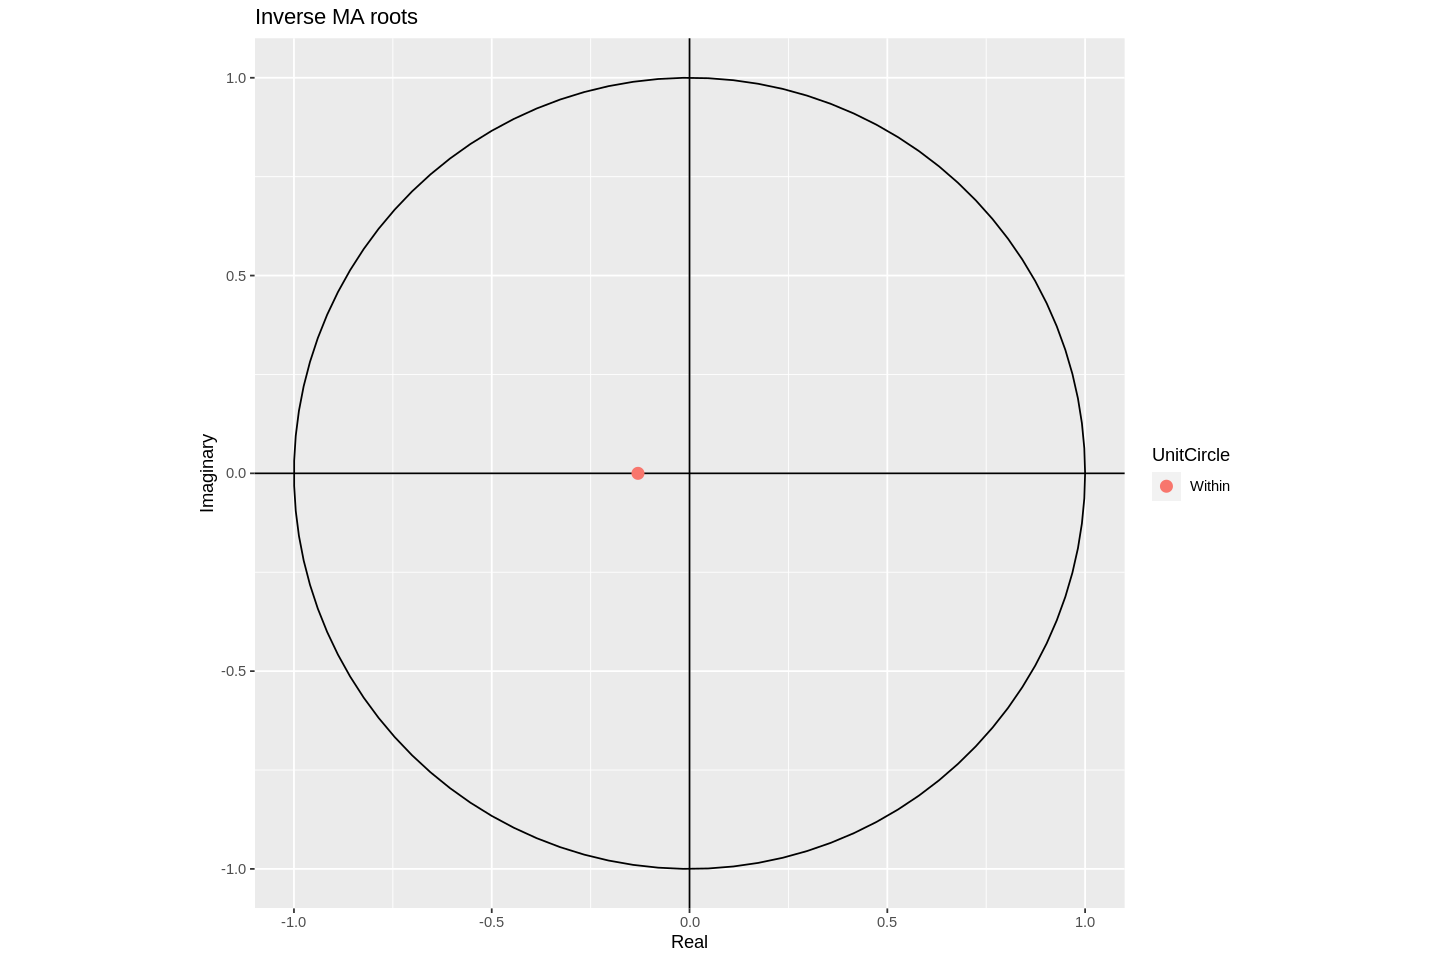

In [101]:
autoplot(tsarima240)

In [102]:
tsarima120 <- auto.arima(head(xts, -120), max.p = 3, max.q = 3, max.d = 3) #120
print(tsarima120)

Series: head(xts, -120) 
ARIMA(0,1,1) with drift 

Coefficients:
         ma1   drift
      0.1257  0.2543
s.e.  0.0189  0.1289

sigma^2 = 38.02:  log likelihood = -9382.7
AIC=18771.4   AICc=18771.41   BIC=18789.31


In [ ]:
tsarima60 <- auto.arima(head(xts, -60), max.p = 3, max.q = 3, max.d = 3) #60
print(tsarima60)

In [ ]:
tsarima30 <- auto.arima(head(xts, -30), max.p = 3, max.q = 3, max.d = 3) #30
print(tsarima30)

## Forecasting using an ARIMA Model


In [106]:
tsforecasts240 <- forecast(tsarima240, h = 240) # forecast the next 240 time series
tsforecasts120 <- forecast(tsarima120, h = 120) # forecast the next 120 time series

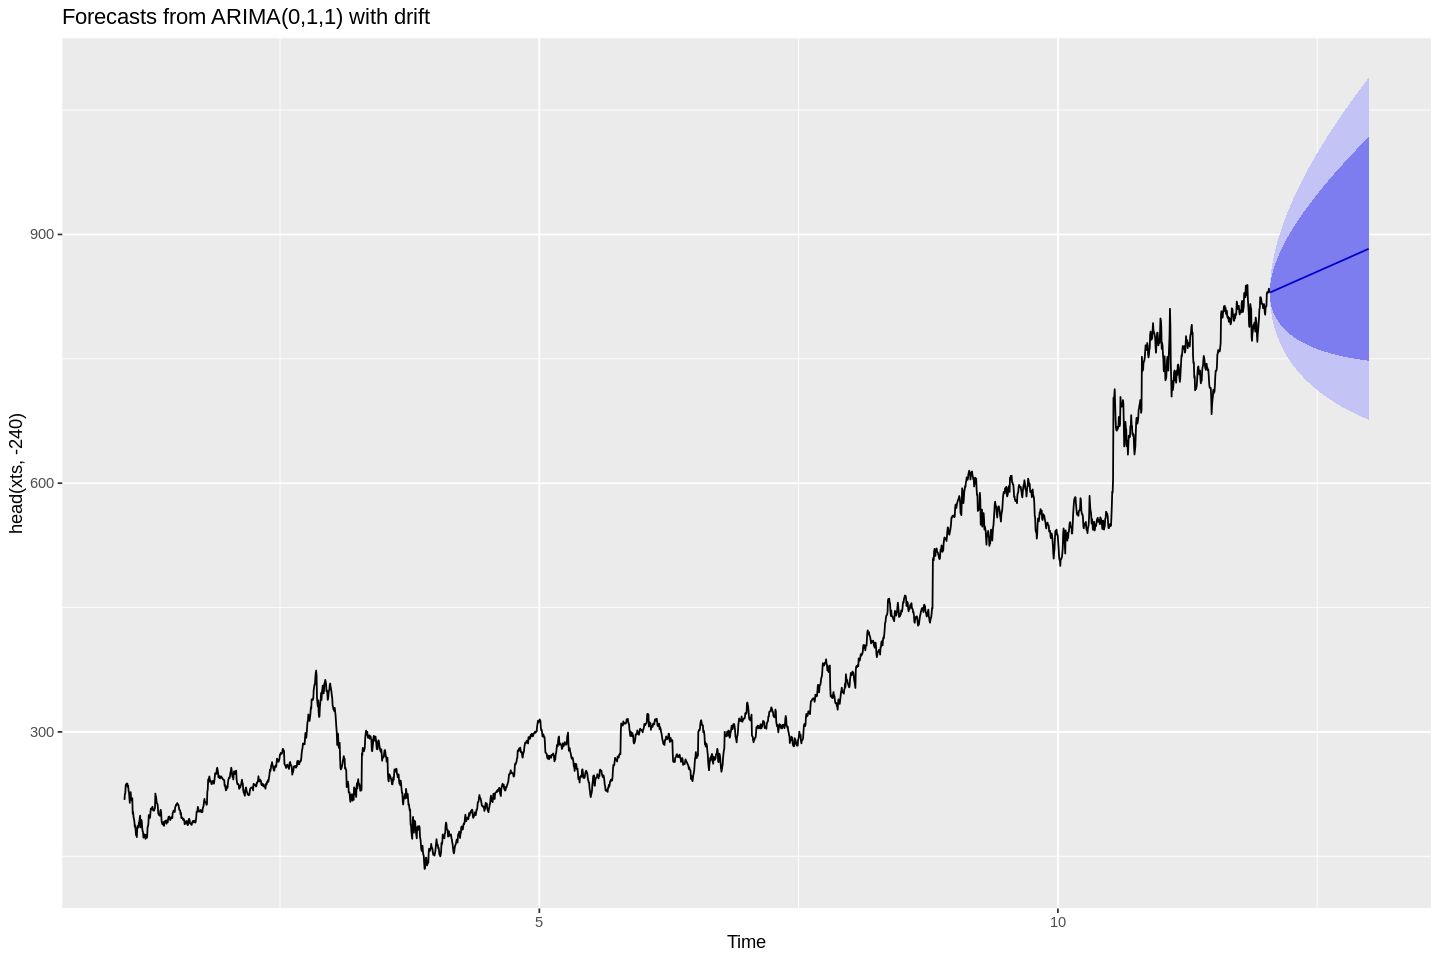

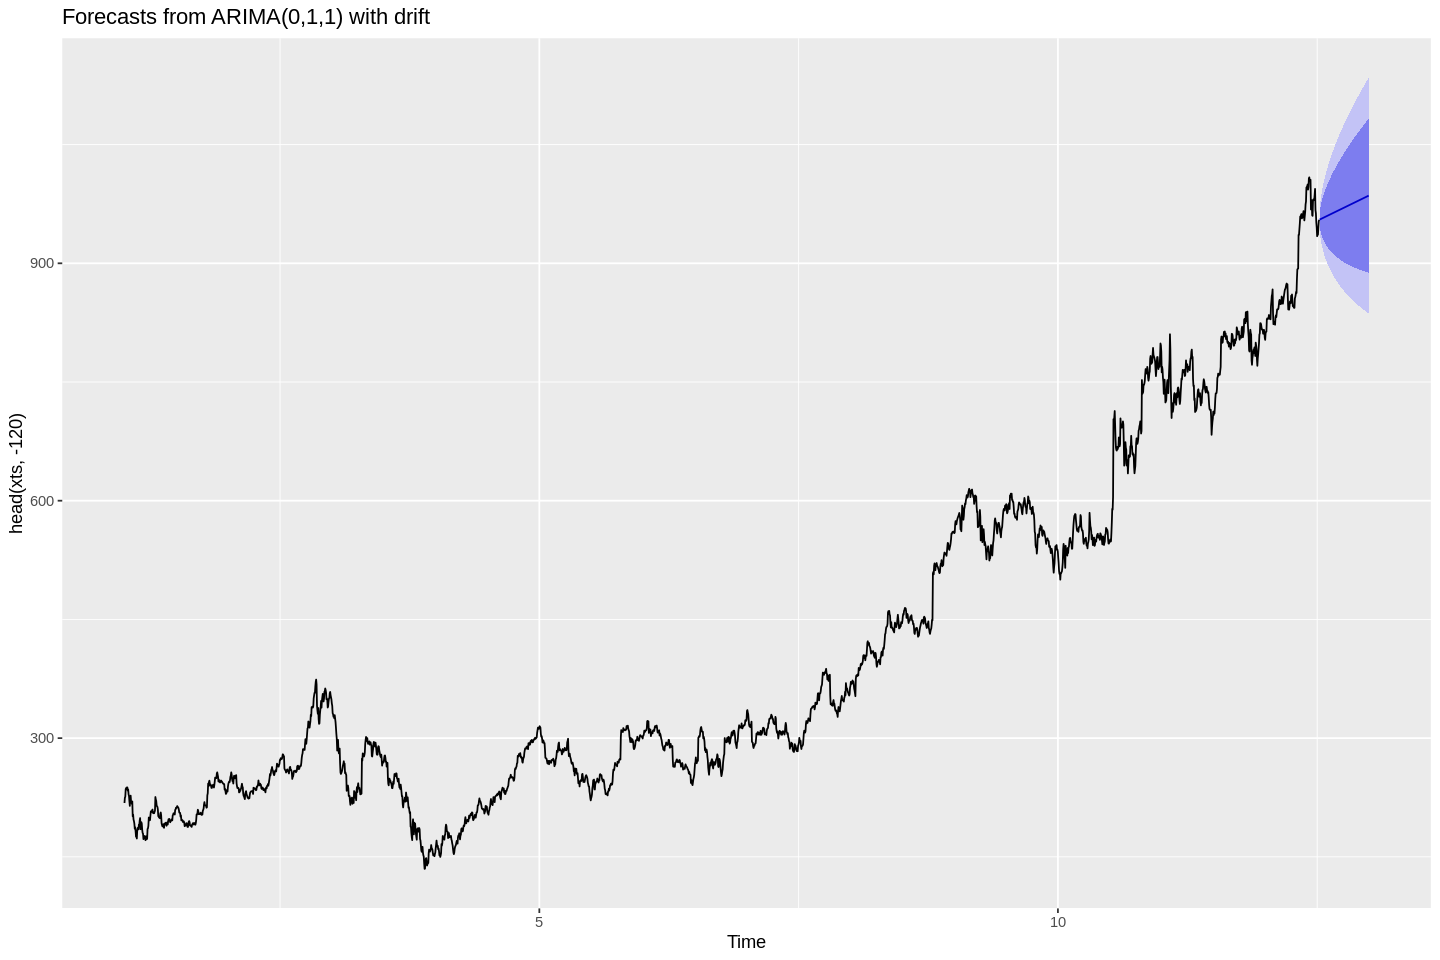

In [107]:
autoplot(tsforecasts240)
autoplot(tsforecasts120)

In [108]:
accuracy(tsforecasts240, head(tail(xts, 240), 240))
accuracy(tsforecasts240, head(tail(xts, 120), 120))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,2.623756e-05,6.00951,3.755254,-0.03071913,1.064141,0.04731777,-0.002888508
Test set,9.433388e+01,111.94246,94.704268,9.48585496,9.530784,1.19331337,NA


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,2.623756e-05,6.00951,3.755254,-0.03071913,1.064141,0.04731777,-0.002888508
Test set,1.562624e+02,161.90127,156.262409,15.46809413,15.468094,1.96897169,NA



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1) with drift
Q* = 706.19, df = 501.17, p-value = 3.779e-09

Model df: 2.   Total lags used: 503.166666666667



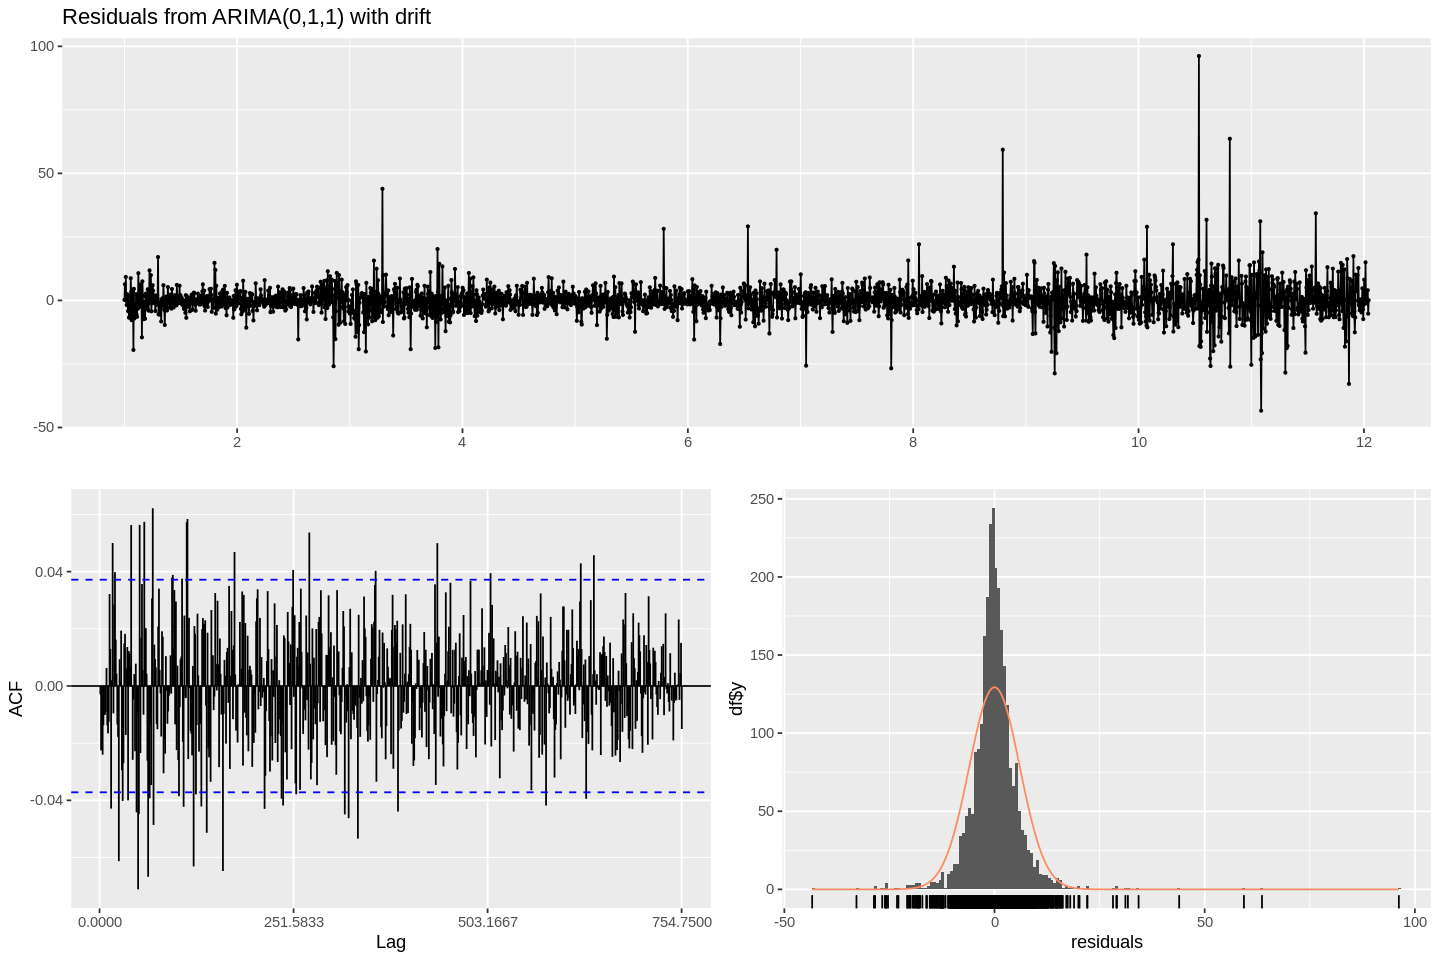

In [109]:
checkresiduals(tsforecasts240)
